In [1]:
import pandas as pd
from scipy.spatial import KDTree
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pickle
from matplotlib import cm
from math import sin, cos, sqrt, atan2, radians
import matplotlib.dates as mdates

# define all helper functions for the data

# function to define the hurricane score
def wind_speed(distance, v_m, r_m):

    b = 2
    x = 0
    s = 0.5
    x = ((r_m/distance)**b)*np.exp(1-(r_m/distance)**b)

    return v_m*x**s

# function to calculate distance using lat, lon (distance in km)
def distance(loc1, loc2):
    # Approximate radius of earth in km
    R = 6373.0

    lat1 = radians(loc1[0])
    lon1 = radians(loc1[1])
    lat2 = radians(loc2[0])
    lon2 = radians(loc2[1])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c

    return distance

# define set of functions to predict Rmax8
def calc_f(lat):
    return 2*.00007292*sin(radians(lat))

def calc_mratio(v_max, r_175, lat):
    return 0.699 * np.exp(-0.00618*(v_max - 17.5)-0.00210*(v_max - 17.5)*(1/2*calc_f(lat)*r_175))

def calc_m175(r_175, lat):
    return r_175 * 17.5 + 1/2 * calc_f(lat)*r_175**2

def calc_rmax(v_max, r_175, lat):
    return v_max/(calc_f(lat))*(sqrt(1+2*calc_f(lat)*(calc_m175(r_175, lat)*calc_mratio(v_max, r_175, lat))/(v_max**2))-1)


/var/folders/56/glwsl01j2jv_87_l49k_p9tw0000gn/T/ipykernel_11704/1905190046.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


BD1: ['1', '7']
[1, 7]


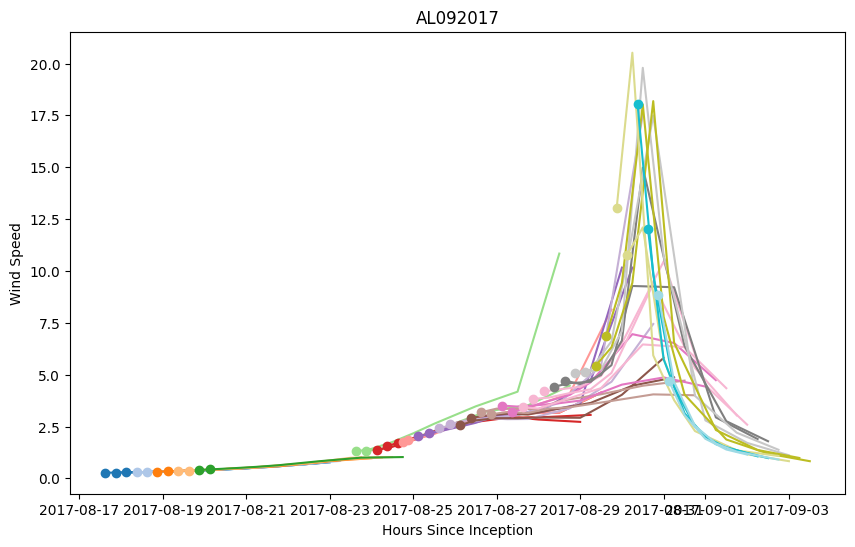

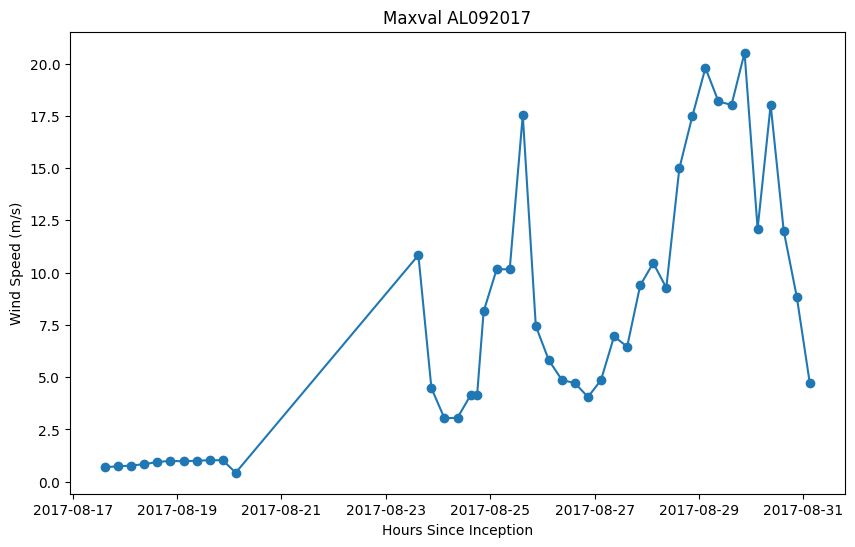

2017-09-15 00:00:00


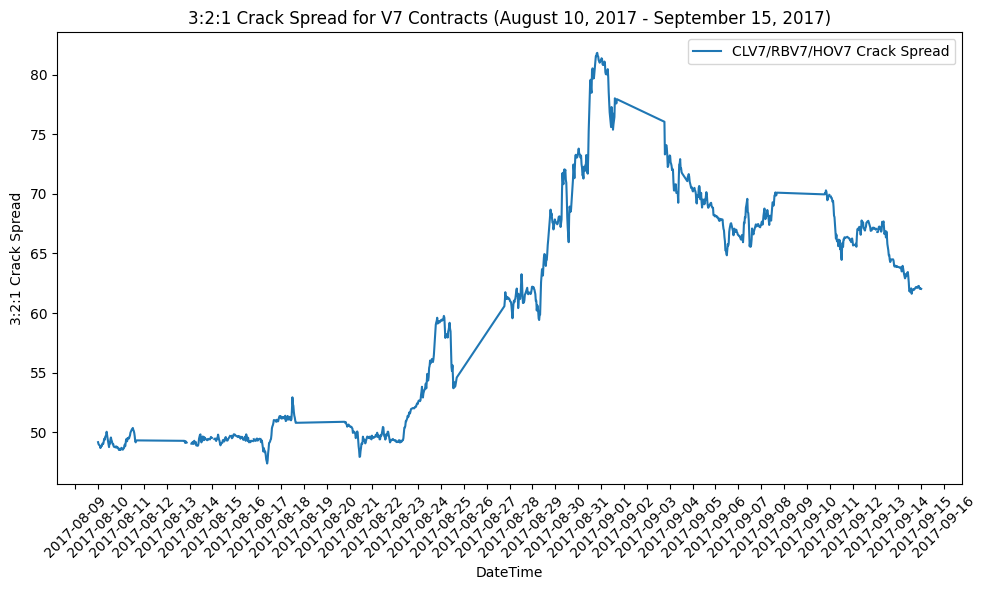

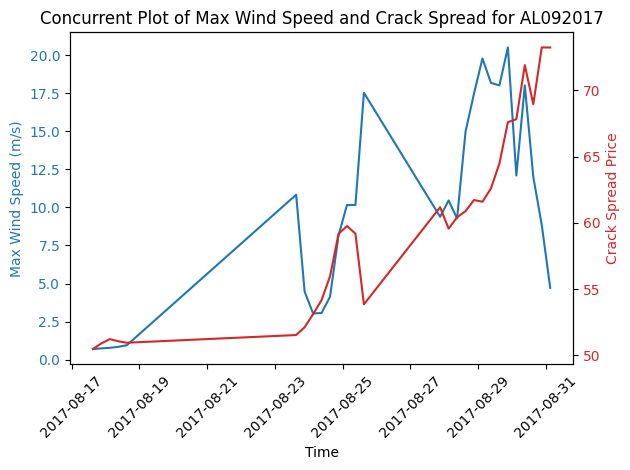

Results for different lags:
Lag: 0 minutes, R²: 0.4145214190835702, Coefficient: 0.6934483156552733, P-value: 3.19749670605515e-06
Lag: 30 minutes, R²: 0.42298585472038586, Coefficient: 0.6978234323313185, P-value: 2.3506785211858997e-06
Lag: 60 minutes, R²: 0.43232383518358497, Coefficient: 0.7018399813592184, P-value: 1.6658853493928244e-06
Lag: 90 minutes, R²: 0.43366629328732875, Coefficient: 0.7016617230870386, P-value: 1.5847339394194639e-06
Lag: 120 minutes, R²: 0.4317799794882443, Coefficient: 0.6976862830187317, P-value: 1.6998787689825638e-06
Lag: 150 minutes, R²: 0.4379187971438909, Coefficient: 0.6987663184377872, P-value: 1.3518637341058256e-06
Lag: 180 minutes, R²: 0.4100156410519672, Coefficient: 0.6926152621860754, P-value: 3.7601463106499384e-06
Lag: 210 minutes, R²: 0.39530389664958787, Coefficient: 0.679401847657338, P-value: 6.3332561843699275e-06
Lag: 240 minutes, R²: 0.38523137604966295, Coefficient: 0.6820210635324347, P-value: 8.989482773532397e-06
Lag: 270 minu

/var/folders/56/glwsl01j2jv_87_l49k_p9tw0000gn/T/ipykernel_11704/3550908998.py:327: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Coefficient': ols_results.params[1],
/var/folders/56/glwsl01j2jv_87_l49k_p9tw0000gn/T/ipykernel_11704/3550908998.py:328: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'P_value': ols_results.pvalues[1]
/var/folders/56/glwsl01j2jv_87_l49k_p9tw0000gn/T/ipykernel_11704/3550908998.py:327: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by positi

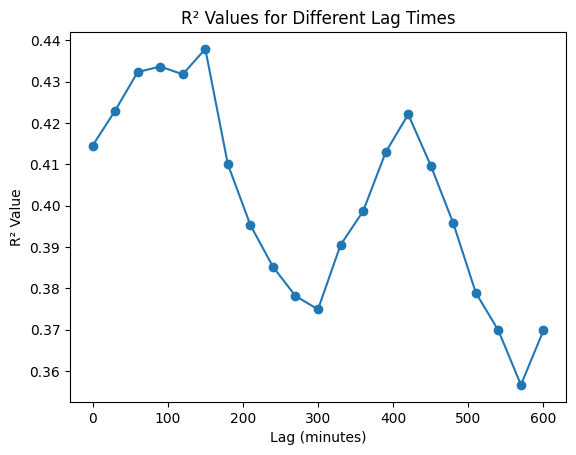

BD1: ['1', '2']
[1, 2]


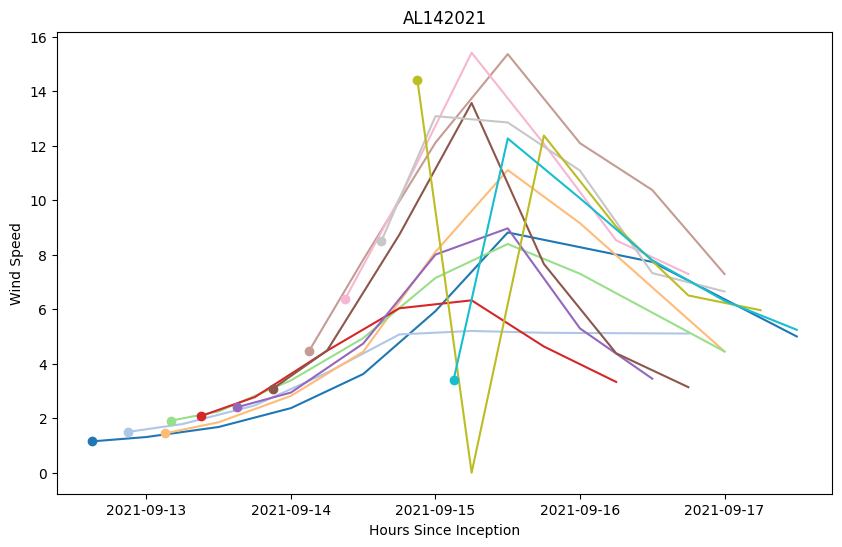

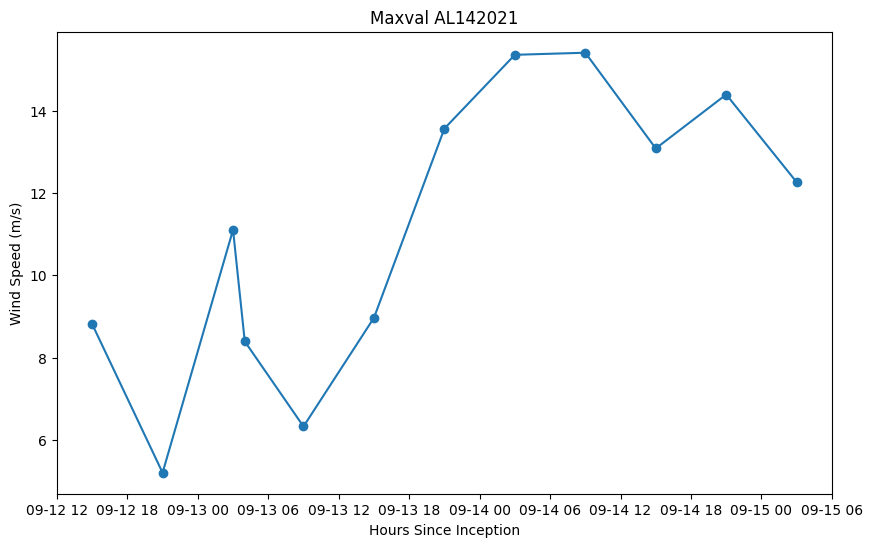

2021-09-24 00:00:00


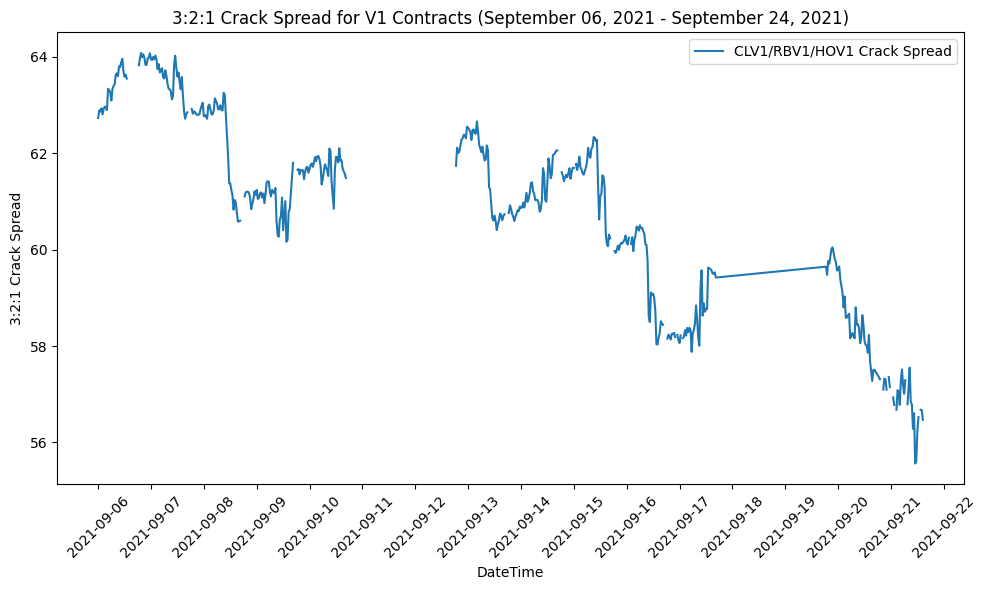

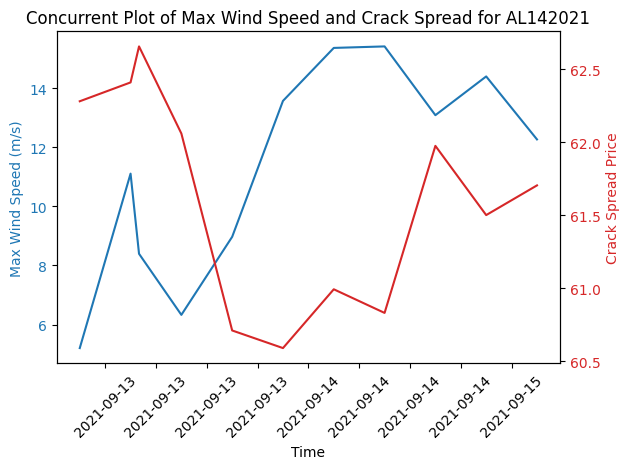

Results for different lags:
Lag: 0 minutes, R²: 0.32850836883099077, Coefficient: -0.11742855163068697, P-value: 0.06529479412186442
Lag: 30 minutes, R²: 0.14045223842431254, Coefficient: -0.07043108310676699, P-value: 0.2561176012072928
Lag: 60 minutes, R²: 0.04651787957115139, Coefficient: -0.03868924145928459, P-value: 0.5241686571409179
Lag: 90 minutes, R²: 0.024877215177266265, Coefficient: -0.026711849763532206, P-value: 0.6432436765631238
Lag: 120 minutes, R²: 0.01961813287041614, Coefficient: -0.023984113460794907, P-value: 0.6812546058691551
Lag: 150 minutes, R²: 0.1448960418933456, Coefficient: -0.06467188923293725, P-value: 0.3121774802377548
Lag: 180 minutes, R²: 0.11216869560410625, Coefficient: -0.05132254365177661, P-value: 0.37831501212346363
Lag: 210 minutes, R²: 0.009588958752144938, Coefficient: -0.017888660979535884, P-value: 0.7745464371326464
Lag: 240 minutes, R²: 0.009459315243174449, Coefficient: -0.016695102682597662, P-value: 0.7636448299690979
Lag: 270 minute

/var/folders/56/glwsl01j2jv_87_l49k_p9tw0000gn/T/ipykernel_11704/3550908998.py:327: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Coefficient': ols_results.params[1],
/var/folders/56/glwsl01j2jv_87_l49k_p9tw0000gn/T/ipykernel_11704/3550908998.py:328: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'P_value': ols_results.pvalues[1]
/var/folders/56/glwsl01j2jv_87_l49k_p9tw0000gn/T/ipykernel_11704/3550908998.py:327: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by positi

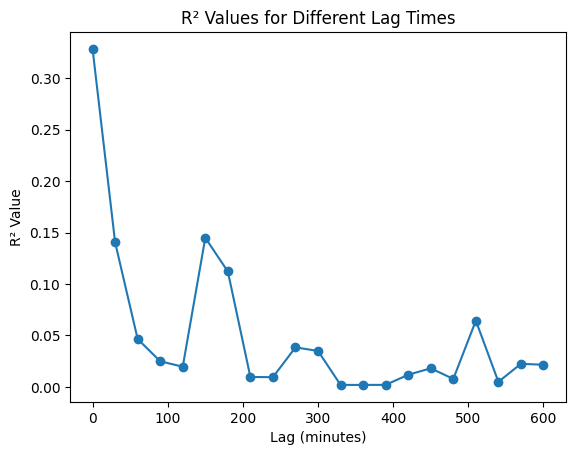

BD1: ['1', '7']
[1, 7]


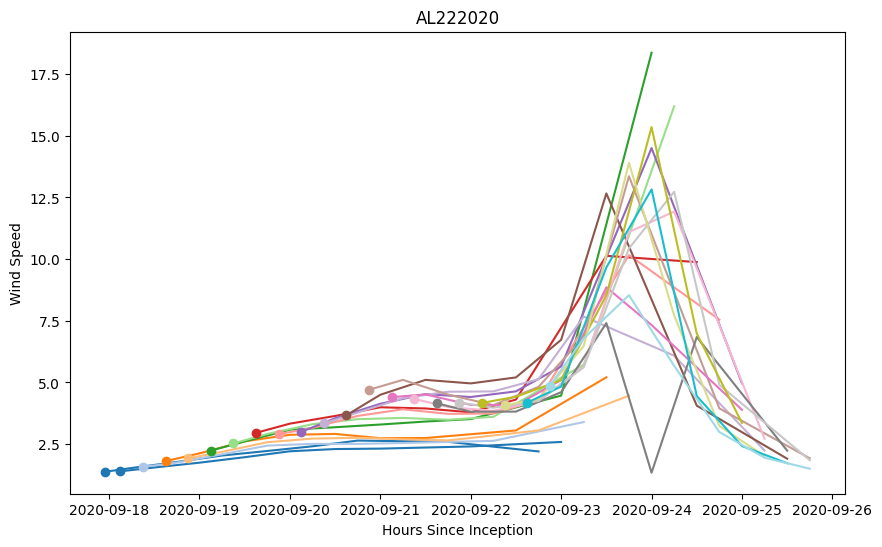

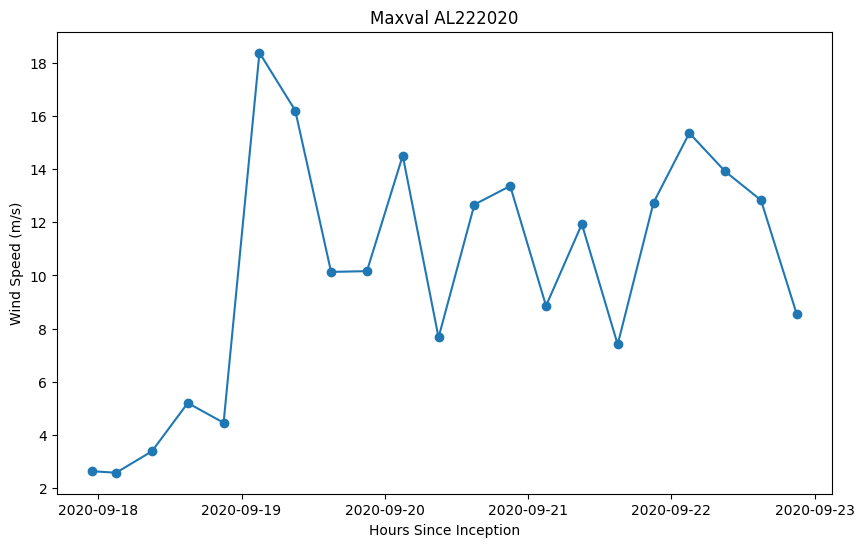

2020-09-25 00:00:00


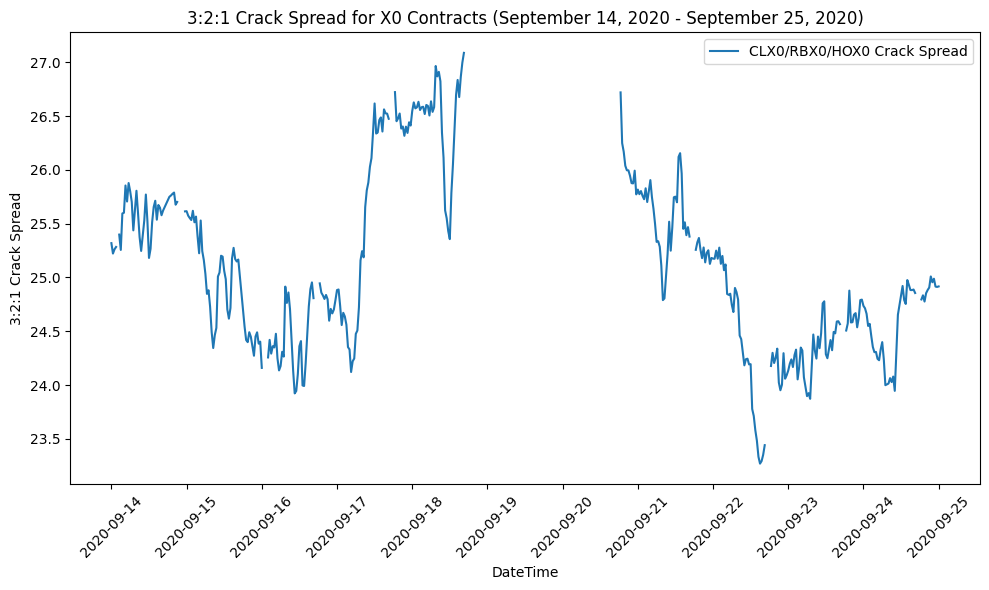

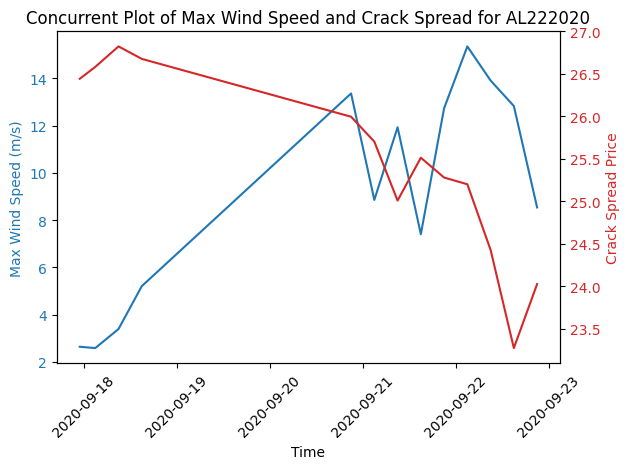

Results for different lags:
Lag: 0 minutes, R²: 0.06579841478927084, Coefficient: -0.06057379779845949, P-value: 0.3203071843258516
Lag: 30 minutes, R²: 0.0577074955653184, Coefficient: -0.05698102309361436, P-value: 0.35303131377350194
Lag: 60 minutes, R²: 0.0555348613793909, Coefficient: -0.05535298528515333, P-value: 0.3625310938345986
Lag: 90 minutes, R²: 0.056532693015048596, Coefficient: -0.05528744595286513, P-value: 0.3581277834210326
Lag: 120 minutes, R²: 0.04601265297688162, Coefficient: -0.05069700197547361, P-value: 0.40837798410608883
Lag: 150 minutes, R²: 0.03145217829412306, Coefficient: -0.03466658482693376, P-value: 0.5441519179737201
Lag: 180 minutes, R²: 0.03581201792518174, Coefficient: -0.037668625933975984, P-value: 0.5170151540351314
Lag: 210 minutes, R²: 0.045421057541293774, Coefficient: -0.047293585947249764, P-value: 0.4114797930035572
Lag: 240 minutes, R²: 0.05508784717719095, Coefficient: -0.05053914711254718, P-value: 0.36452642490434206
Lag: 270 minutes, 

/var/folders/56/glwsl01j2jv_87_l49k_p9tw0000gn/T/ipykernel_11704/3550908998.py:327: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Coefficient': ols_results.params[1],
/var/folders/56/glwsl01j2jv_87_l49k_p9tw0000gn/T/ipykernel_11704/3550908998.py:328: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'P_value': ols_results.pvalues[1]
/var/folders/56/glwsl01j2jv_87_l49k_p9tw0000gn/T/ipykernel_11704/3550908998.py:327: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by positi

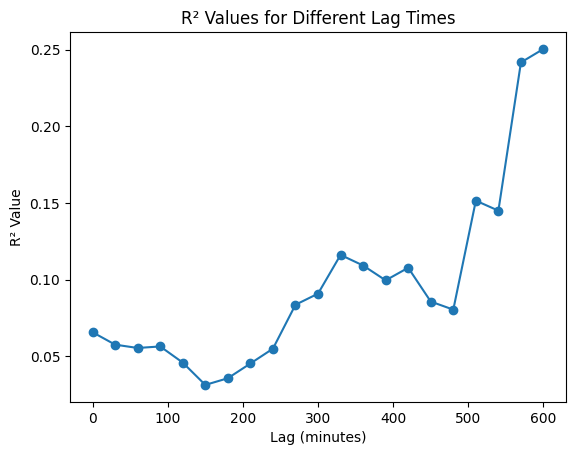

In [6]:
storms = ['AL092017', 'AL142021', 'AL222020']
houston = np.array([29.7604, -95.3698]) # define the lat lon values for houston
galveston = ([29.3013, -94.7977]) # define the lat lon values for galveston
port_arthur = ([29.8850, -93.9399]) # define lat long values for port arthur

# define the variables X and Y for the final regression
X = pd.DataFrame()
Y = pd.DataFrame()

def wind(storm):

    file_path = f'Intraday_data/{storm}.csv'
    data = pd.read_csv(file_path)

    # Beginning of the Data
    date_string = data.iloc[1]['date']
    parsed_date = datetime.strptime(date_string, "%Y-%m-%d")
    storm_month = parsed_date.month # the storm's initial month
    storm_day = parsed_date.day # the storm's initial day
    storm_year = int(storm[-4:])

    with open(f"Data/{storm_year}data.pkl", 'rb') as f:
        x = pickle.load(f)

    # Initialize inception time (storm conception time)
    inception_time_str = x[storm]['1']['INIT']['Time (UTC)']
    inception_day = int(inception_time_str[:2])
    inception_hour = 0 # updated later
    inception_time = datetime(storm_year, storm_month, inception_day, inception_hour)

    # set up the figure for each storm
    fig, ax = plt.subplots(figsize=(10, 6))
    plt.title(f"{storm}")
    plt.xlabel("Hours Since Inception")
    plt.ylabel("Wind Speed")

    day_count = 0
    prev28 = 0
    prev29 = 0
    prev30 = 0
    prev31 = 0
    base_day = list(x[storm]['1']['INIT']['Time (UTC)'])[0:2]
    print("BD1:", base_day)
    base_day = [int(base_day[0]), int(base_day[1])]
    print(base_day)
    max_harr = []
    t_release = []

    # iterate through each discussion (forecast)
    for i, key in enumerate(x[storm].keys()):
        times = [] # temporary until I have final formula for the threat score
        wind_speeds = []
        lat_arr = []
        lon_arr = []
        hscore_arr = []
        datetimes = []  # Store datetime objects
        max_hs = 0

        # iterate through each line in a discussion
        for j, key2 in enumerate(x[storm][key].keys()):
        
            # print(key, key2) # for debugging

            # only add if storm is not dissipated
            if (x[storm][key][key2]['Dissipated?'] != True):

                # extract lat/lon strings
                lat = x[storm][key][key2]['Latitude']
                lon = x[storm][key][key2]['Longitude']
                ws_temp = x[storm][key][key2]['Wind Speed (KT)']   
                
                time_string = list(x[storm][key][key2]['Time (UTC)'])

                current_day = [int(time_string[0]), int(time_string[1])]
                add31 = 0

                # check if the date ever crosses the month border, and if it does, then store what the previous day was
                if ((current_day[0] - base_day[0])*10 + (current_day[1] - base_day[1])) < 0:
                    if prev_day == [3,1]:
                        prev31 = 1
                    elif prev_day == [3,0]:
                        prev30 = 1
                    elif prev_day == [2,9]:
                        prev29 = 1
                    elif prev_day == [2,8]:
                        prev28 = 1
                    
                    # calculating the total number of hours past the initial date
                    adds = prev28 * 28 + prev29 * 29 + prev30 * 30 + prev31 * 31
                    day_hrs = ((current_day[0] - base_day[0])*10 + (current_day[1] - base_day[1]) + adds)* 24
                    hour = int(time_string[3]) * 10 + int(time_string[4]) + day_hrs
    
                    # Extract time and convert to datetime
                    current_datetime = inception_time + timedelta(hours=hour)
                    times.append(current_datetime)

                # if the date doesn't cross a month border, continue as usual
                else:
                    day_hrs = ((current_day[0] - base_day[0])*10 + (current_day[1] - base_day[1]))* 24
                    hour = int(time_string[3]) * 10 + int(time_string[4]) + day_hrs

                    # Extract time and convert to datetime
                    current_datetime = inception_time + timedelta(hours=hour)
                    times.append(current_datetime)
            
                # append the wind speed in knots to the wind speed array
                wind_speeds.append(int(ws_temp))

                # get the location of the storm
                if (lat[-1] == "N"):
                    lat_arr.append(float(lat[0:-1]))
                elif (lat[-1] == "S"):
                    lat_arr.append(-float(lat[0:-1]))
                if (lon[-1] == "E"):
                    lon_arr.append(float(lon[0:-1]))
                elif (lon[-1] == "W"):
                    lon_arr.append(-float(lon[0:-1]))

                # define the storm that we are interested in analyzing
                city = port_arthur

                # calculate distance from city to the storm
                dist = distance(city, np.array([lat_arr[-1], lon_arr[-1]]))

                # convert to knots to m/s
                windspeed_ms = int(ws_temp) * 0.5144

                # append the wind speed in the city to the forecast's array, based on the equations of the wind field model from above
                hscore_arr.append(wind_speed(dist, windspeed_ms, calc_rmax(windspeed_ms, 60, lat_arr[-1])))

                # store the max wind speed in a given forecast
                if (hscore_arr[-1] > max_hs):
                    max_hs = hscore_arr[-1]

                # go to the next day
                prev_day = current_day
        
        # append the max wind speed after each forecast
        max_harr.append(max_hs)

        # append the initial release time for each forecast
        t_release.append(times[0])
        
        colormap = cm.tab20
        color = colormap(i / len(x[storm]))


        
        # plotting the forecasts
        ax.plot(times[0], hscore_arr[0], marker = "o", color = color)
        ax.plot(times, hscore_arr, color=color, label = key)

    plt.show()

    
    fig2, ax2 = plt.subplots(figsize=(10, 6))
    plt.title(f"Maxval {storm}")
    plt.xlabel("Hours Since Inception")
    plt.ylabel("Wind Speed (m/s)")
    ax2.plot(t_release, max_harr, marker = "o")
    plt.show()

    return t_release, max_harr

def crack(storm):

    file_path = f'Intraday_data/{storm}.csv'
    data = pd.read_csv(file_path)

    # Beginning of the Data
    date_string = data.iloc[1]['date']
    parsed_date = datetime.strptime(date_string, "%Y-%m-%d")
    storm_month = parsed_date.month # the storm's initial month
    storm_day = parsed_date.day # the storm's initial day
    storm_year = int(storm[-4:])

    # Convert date and time to a datetime format
    data['datetime'] = pd.to_datetime(data['date']) + pd.to_timedelta(data['time'], unit='min')

    # Convert HO and RB prices to per barrel
    data.loc[data['sym'].str.contains('HO') | data['sym'].str.contains('RB'), ['bid', 'ask', 'prc']] *= 42

    contract = data.iloc[-1]['sym'][2:]
    ho = f'HO{contract}'
    rb = f'RB{contract}'
    cl = f'CL{contract}'
    
    date_final = data.iloc[-1]['date']
    parsed_date_final = datetime.strptime(date_final, "%Y-%m-%d")
    print(parsed_date_final)
    final_month = parsed_date_final.month # the storm's initial month
    final_day = parsed_date_final.day # the storm's initial day
    final_year = parsed_date_final.year

    storm_year = int(storm[-4:])

    
    # Filter data for the desired date range and specific contracts
    start_date = datetime(storm_year, storm_month, storm_day)
    end_date = datetime(final_year,final_month, final_day)
    filtered_data = data[(data['datetime'] >= start_date) & (data['datetime'] <= end_date)]
    filtered_data = filtered_data[filtered_data['sym'].isin([cl, rb, ho])]
        

    # Pivot the data for easier calculation
    pivoted_data = filtered_data.pivot_table(index='datetime', columns='sym', values='prc')

    # Calculate the 3:2:1 crack spreads
    pivoted_data['321crack_spread'] = -1* ( 3 * pivoted_data[cl] - 2 * pivoted_data[rb] - pivoted_data[ho])

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(pivoted_data.index, pivoted_data['321crack_spread'], label=f'{cl}/{rb}/{ho} Crack Spread')

    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator())
    plt.xticks(rotation=45)
    plt.xlabel('DateTime')
    plt.ylabel('3:2:1 Crack Spread')
    plt.title(f'3:2:1 Crack Spread for {contract} Contracts ({start_date.strftime("%B %d, %Y")} - {end_date.strftime("%B %d, %Y")})')
    plt.legend()
    plt.tight_layout()
    plt.show()


    return pivoted_data

time_difference_threshold = 300  # 30 minutes, for example

# iterate through each storm in the 'storms' list above. This will be the loop that sets up the X and Y data for the regression
for storm in storms:

    t_release, max_harr = wind(storm)
    
    # Phase 2: Processing the Crack Spread Data
    
    pivoted_data = crack(storm)

    # Phase 3: Plotting

    # Convert t_release to pandas datetime for better plotting and aligning
    t_release_datetime = pd.to_datetime(t_release)

    # Convert pivoted_data index to the same format as t_release for KDTree
    pivoted_data_seconds = pivoted_data.index.map(lambda x: x.timestamp())
    t_release_seconds = t_release_datetime.map(lambda x: x.timestamp()).values.reshape(-1, 1)

    # Create KDTree and find the nearest dates in pivoted_data for each date in t_release
    tree = KDTree(pivoted_data_seconds.values.reshape(-1, 1))
    distances, indices = tree.query(t_release_seconds)

    # Filter out indices where the distance is more than the threshold
    valid_indices = distances < time_difference_threshold
    aligned_t_release = t_release_datetime[valid_indices]
    aligned_max_harr = np.array(max_harr)[valid_indices]

    # Align crack spread values with filtered t_release dates
    aligned_crack_spreads = pivoted_data['321crack_spread'].iloc[indices][valid_indices].values

    # Create the figure and the first axis for max wind speed
    fig, ax1 = plt.subplots()

    # Max Wind Speed plot (ax1)
    color = 'tab:blue'
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Max Wind Speed (m/s)', color=color)
    ax1.plot(aligned_t_release, aligned_max_harr, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    # Setting up the x-axis for dates
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.xticks(rotation=45)

    # Create the second axis for crack spread
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    # Crack Spread plot (ax2)
    color = 'tab:red'
    ax2.set_ylabel('Crack Spread Price', color=color)
    ax2.plot(aligned_t_release, aligned_crack_spreads, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    # Title and layout
    plt.title(f'Concurrent Plot of Max Wind Speed and Crack Spread for {storm}')
    fig.tight_layout()
    plt.show()




    # Define the range of lags to test
    lag_range = range(0, 601, 30)  # From 30 to 300 minutes, in steps of 30 minutes

    # Dictionary to store results for each lag
    results = {}

    # Loop over the specified range of lags
    for lag_minutes in lag_range:
        # Steps 1 to 5 from your code with adjusted lag
        wind_speed_data = pd.DataFrame({
            'datetime': pd.Series(t_release),
            'max_harr': max_harr
        }).query('max_harr >= 0')

        wind_speed_data['datetime_lagged'] = wind_speed_data['datetime'] + pd.to_timedelta(lag_minutes, unit='min')
        wind_speed_seconds = wind_speed_data['datetime_lagged'].apply(lambda x: x.timestamp()).values

        pivoted_data_seconds = pivoted_data.index.map(lambda x: x.timestamp())
        tree = KDTree(pivoted_data_seconds.values.reshape(-1, 1))
        _, indices = tree.query(wind_speed_seconds.reshape(-1, 1))

        aligned_crack_spreads = pivoted_data['321crack_spread'].iloc[indices].values
        wind_speed_data['aligned_crack_spread'] = aligned_crack_spreads
        wind_speed_data = wind_speed_data.dropna()

        # Regression Analysis for each lag
        X = wind_speed_data['max_harr'].values.reshape(-1, 1)
        y = wind_speed_data['aligned_crack_spread']

        X_with_constant = sm.add_constant(X)
        ols_model = sm.OLS(y, X_with_constant)
        ols_results = ols_model.fit()

        # Record results
        results[lag_minutes] = {
            'R_squared': ols_results.rsquared,
            'Coefficient': ols_results.params[1],
            'P_value': ols_results.pvalues[1]
        }

    # Print the results for each lag
    print("Results for different lags:")
    for lag, result in results.items():
        print(f"Lag: {lag} minutes, R²: {result['R_squared']}, Coefficient: {result['Coefficient']}, P-value: {result['P_value']}")

    # Optionally, plot the R² values
    plt.figure()
    plt.plot([lag for lag in results], [result['R_squared'] for result in results.values()], marker='o')
    plt.xlabel('Lag (minutes)')
    plt.ylabel('R² Value')
    plt.title('R² Values for Different Lag Times')
    plt.show()


        


